## Building a Recommender system using un-supervised learning

In this script, we have tried to build a recommender system with  the help of three of the most common unsupervised learning algorithm for NLP. 1. Latent Semantic Analysis, 2. Matrix Factorization, 3. Latent Dirichlet Allocation.

## What is a Recommender System?
The recommender system is a system that is capable of predicting the possible 
preferences for a particular set of items that a user might prefer based on his 
previous behavior or preferences. For example, you ask your dad to bring you 
chocolate ice-cream whenever the weather is very hot, from his previous experience 
he found that you love chocolate flavor much more than any other flavor. 
Therefore on your birthday, he thought of giving you a surprise by presenting
you a chocolate cake without your advice expecting that you would definitely
love the chocolate cake.


![Recommendation System](https://image2.slideserve.com/4030528/recommender-system-l.jpg)


The same thing goes for recommender systems also, varoius websites like YouTube,
Google Adds, Imdb etc use this recommender system to recommend you items based
on your previous tastes or items that have been viewed by similar persons like you.

## What is a Unsupervised Learning?

Artificially intelligent Algorithms or models could learn and train from two types
of data, one that have target labels and another that do not have target labels. When these algorithms
are trained through labeled data then the learning technique is called Supervised
Learning. And when we are training the model through unlabeled data we call it 
Unsupervised Learning. For more Information you could google it out.
![Unsupervised](https://lawtomated.com/wp-content/uploads/2019/04/supVsUnsup.png)


In [2]:
!pip install umap-learn

     |████████████████████████████████| 86 kB 3.5 MB/s 
     |████████████████████████████████| 1.1 MB 28.6 MB/s 
  Created wheel for umap-learn: filename=umap_learn-0.5.2-py3-none-any.whl size=82708 sha256=9058f1a6f991cb990b1c9ef2e6e310052bd94c7c20bd9fdaa568a1090dd6d339
  Stored in directory: /root/.cache/pip/wheels/84/1b/c6/aaf68a748122632967cef4dffef68224eb16798b6793257d82
  Created wheel for pynndescent: filename=pynndescent-0.5.6-py3-none-any.whl size=53943 sha256=b938bfc85cdf884ad4ab0368a473871599734e3943f48c2260d8a06b24be8357
  Stored in directory: /root/.cache/pip/wheels/03/f1/56/f80d72741e400345b5a5b50ec3d929aca581bf45e0225d5c50
Successfully built umap-learn pynndescent


In [16]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem.porter import PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
import matplotlib.pyplot as plt
from sklearn.decomposition import TruncatedSVD, NMF,LatentDirichletAllocation
import seaborn as sns
from tqdm import tqdm as tqdm_base
from gensim.models.ldamodel import LdaModel
from gensim.corpora import Dictionary
import umap

nltk.download('stopwords')
nltk.download('punkt')

def tqdm(*args, **kwargs):
    if hasattr(tqdm_base, '_instances'):
        for instance in list(tqdm_base._instances):
            tqdm_base._decr_instances(instance)
    return tqdm_base(*args, **kwargs)

'''Loading the movie dataset'''
movie_df = pd.read_csv('https://media.githubusercontent.com/media/mariolpantunes/ml101/main/datasets/wiki_movie_plots_deduped.csv')
#movie_df.head()
#movie_df['Genre'].value_counts()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [4]:
def Data_Cleaning(Genre):
    '''
    Here we have cleaned the entire Genre column of the dataset by removing unwanted symbols, categories, and 
    replacing categories which meant the same with a common category name. It reduduces our number of target labels.
    NOTE: This function is inspired from the kernel - https://www.kaggle.com/aminejallouli/genre-classification-based-on-wiki-movies-plots
    I have only improved it a bit further according to my requirements.
    '''
    movie_df['Genre_improved'] = movie_df['Genre']
    movie_df['Genre_improved']=movie_df['Genre_improved'].str.strip()
    movie_df['Genre_improved']=movie_df['Genre_improved'].str.replace(' - ', '|')
    movie_df['Genre_improved']=movie_df['Genre_improved'].str.replace(' / ', '|')
    movie_df['Genre_improved']=movie_df['Genre_improved'].str.replace('/', '|')
    movie_df['Genre_improved']=movie_df['Genre_improved'].str.replace(' & ', '|')
    movie_df['Genre_improved']=movie_df['Genre_improved'].str.replace(', ', '|')
    movie_df['Genre_improved']=movie_df['Genre_improved'].str.replace('; ', '|')
    movie_df['Genre_improved']=movie_df['Genre_improved'].str.replace('bio-pic', 'biography')
    movie_df['Genre_improved']=movie_df['Genre_improved'].str.replace('biopic', 'biography')
    movie_df['Genre_improved']=movie_df['Genre_improved'].str.replace('biographical', 'biography')
    movie_df['Genre_improved']=movie_df['Genre_improved'].str.replace('biodrama', 'biography')
    movie_df['Genre_improved']=movie_df['Genre_improved'].str.replace('bio-drama', 'biography')
    movie_df['Genre_improved']=movie_df['Genre_improved'].str.replace('biographic', 'biography')
    movie_df['Genre_improved']=movie_df['Genre_improved'].str.replace(' \(film genre\)', '')
    movie_df['Genre_improved']=movie_df['Genre_improved'].str.replace('animated','animation')
    movie_df['Genre_improved']=movie_df['Genre_improved'].str.replace('anime','animation')
    movie_df['Genre_improved']=movie_df['Genre_improved'].str.replace('children\'s','children')
    movie_df['Genre_improved']=movie_df['Genre_improved'].str.replace('comedey','comedy')
    movie_df['Genre_improved']=movie_df['Genre_improved'].str.replace('\[not in citation given\]','')
    movie_df['Genre_improved']=movie_df['Genre_improved'].str.replace(' set 4,000 years ago in the canadian arctic','')
    movie_df['Genre_improved']=movie_df['Genre_improved'].str.replace('historical','history')
    movie_df['Genre_improved']=movie_df['Genre_improved'].str.replace('romantic','romance')
    movie_df['Genre_improved']=movie_df['Genre_improved'].str.replace('3-d','animation')
    movie_df['Genre_improved']=movie_df['Genre_improved'].str.replace('3d','animation')
    movie_df['Genre_improved']=movie_df['Genre_improved'].str.replace('viacom 18 motion pictures','')
    movie_df['Genre_improved']=movie_df['Genre_improved'].str.replace('sci-fi','science_fiction')
    movie_df['Genre_improved']=movie_df['Genre_improved'].str.replace('ttriller','thriller')
    movie_df['Genre_improved']=movie_df['Genre_improved'].str.replace('.','')
    movie_df['Genre_improved']=movie_df['Genre_improved'].str.replace('based on radio serial','')
    movie_df['Genre_improved']=movie_df['Genre_improved'].str.replace(' on the early years of hitler','')
    movie_df['Genre_improved']=movie_df['Genre_improved'].str.replace('sci fi','science_fiction')
    movie_df['Genre_improved']=movie_df['Genre_improved'].str.replace('science fiction','science_fiction')
    movie_df['Genre_improved']=movie_df['Genre_improved'].str.replace(' (30min)','')
    movie_df['Genre_improved']=movie_df['Genre_improved'].str.replace('16 mm film','short')
    movie_df['Genre_improved']=movie_df['Genre_improved'].str.replace('\[140\]','drama')
    movie_df['Genre_improved']=movie_df['Genre_improved'].str.replace('\[144\]','')
    movie_df['Genre_improved']=movie_df['Genre_improved'].str.replace(' for ','')
    movie_df['Genre_improved']=movie_df['Genre_improved'].str.replace('adventures','adventure')
    movie_df['Genre_improved']=movie_df['Genre_improved'].str.replace('kung fu','martial_arts')
    movie_df['Genre_improved']=movie_df['Genre_improved'].str.replace('kung-fu','martial_arts')
    movie_df['Genre_improved']=movie_df['Genre_improved'].str.replace('martial arts','martial_arts')
    movie_df['Genre_improved']=movie_df['Genre_improved'].str.replace('world war ii','war')
    movie_df['Genre_improved']=movie_df['Genre_improved'].str.replace('world war i','war')
    movie_df['Genre_improved']=movie_df['Genre_improved'].str.replace('biography about montreal canadiens star|maurice richard','biography')
    movie_df['Genre_improved']=movie_df['Genre_improved'].str.replace('bholenath movies|cinekorn entertainment','')
    movie_df['Genre_improved']=movie_df['Genre_improved'].str.replace(' \(volleyball\)','')
    movie_df['Genre_improved']=movie_df['Genre_improved'].str.replace('spy film','spy')
    movie_df['Genre_improved']=movie_df['Genre_improved'].str.replace('anthology film','anthology')
    movie_df['Genre_improved']=movie_df['Genre_improved'].str.replace('biography fim','biography')
    movie_df['Genre_improved']=movie_df['Genre_improved'].str.replace('avant-garde','avant_garde')
    movie_df['Genre_improved']=movie_df['Genre_improved'].str.replace('biker film','biker')
    movie_df['Genre_improved']=movie_df['Genre_improved'].str.replace('buddy cop','buddy')
    movie_df['Genre_improved']=movie_df['Genre_improved'].str.replace('buddy film','buddy')
    movie_df['Genre_improved']=movie_df['Genre_improved'].str.replace('comedy 2-reeler','comedy')
    movie_df['Genre_improved']=movie_df['Genre_improved'].str.replace('films','')
    movie_df['Genre_improved']=movie_df['Genre_improved'].str.replace('film','')
    movie_df['Genre_improved']=movie_df['Genre_improved'].str.replace('biography of pioneering american photographer eadweard muybridge','biography')
    movie_df['Genre_improved']=movie_df['Genre_improved'].str.replace('british-german co-production','')
    movie_df['Genre_improved']=movie_df['Genre_improved'].str.replace('bruceploitation','martial_arts')
    movie_df['Genre_improved']=movie_df['Genre_improved'].str.replace('comedy-drama adaptation of the mordecai richler novel','comedy-drama')
    movie_df['Genre_improved']=movie_df['Genre_improved'].str.replace('movies by the mob\|knkspl','')
    movie_df['Genre_improved']=movie_df['Genre_improved'].str.replace('movies','')
    movie_df['Genre_improved']=movie_df['Genre_improved'].str.replace('movie','')
    movie_df['Genre_improved']=movie_df['Genre_improved'].str.replace('coming of age','coming_of_age')
    movie_df['Genre_improved']=movie_df['Genre_improved'].str.replace('coming-of-age','coming_of_age')
    movie_df['Genre_improved']=movie_df['Genre_improved'].str.replace('drama about child soldiers','drama')
    movie_df['Genre_improved']=movie_df['Genre_improved'].str.replace('(( based).+)','')
    movie_df['Genre_improved']=movie_df['Genre_improved'].str.replace('(( co-produced).+)','')
    movie_df['Genre_improved']=movie_df['Genre_improved'].str.replace('(( adapted).+)','')
    movie_df['Genre_improved']=movie_df['Genre_improved'].str.replace('(( about).+)','')
    movie_df['Genre_improved']=movie_df['Genre_improved'].str.replace('musical b','musical')
    movie_df['Genre_improved']=movie_df['Genre_improved'].str.replace('animationchildren','animation|children')
    movie_df['Genre_improved']=movie_df['Genre_improved'].str.replace(' period','period')
    movie_df['Genre_improved']=movie_df['Genre_improved'].str.replace('drama loosely','drama')
    movie_df['Genre_improved']=movie_df['Genre_improved'].str.replace(' \(aquatics|swimming\)','')
    movie_df['Genre_improved']=movie_df['Genre_improved'].str.replace(' \(aquatics|swimming\)','')
    movie_df['Genre_improved']=movie_df['Genre_improved'].str.replace("yogesh dattatraya gosavi's directorial debut \[9\]",'')
    movie_df['Genre_improved']=movie_df['Genre_improved'].str.replace("war-time","war")
    movie_df['Genre_improved']=movie_df['Genre_improved'].str.replace("wartime","war")
    movie_df['Genre_improved']=movie_df['Genre_improved'].str.replace("ww1","war")
    movie_df['Genre_improved']=movie_df['Genre_improved'].str.replace('unknown','')
    movie_df['Genre_improved']=movie_df['Genre_improved'].str.replace("wwii","war")
    movie_df['Genre_improved']=movie_df['Genre_improved'].str.replace('psychological','psycho')
    movie_df['Genre_improved']=movie_df['Genre_improved'].str.replace('rom-coms','romance')
    movie_df['Genre_improved']=movie_df['Genre_improved'].str.replace('true crime','crime')
    movie_df['Genre_improved']=movie_df['Genre_improved'].str.replace('\|007','')
    movie_df['Genre_improved']=movie_df['Genre_improved'].str.replace('slice of life','slice_of_life')
    movie_df['Genre_improved']=movie_df['Genre_improved'].str.replace('computer animation','animation')
    movie_df['Genre_improved']=movie_df['Genre_improved'].str.replace('gun fu','martial_arts')
    movie_df['Genre_improved']=movie_df['Genre_improved'].str.replace('j-horror','horror')
    movie_df['Genre_improved']=movie_df['Genre_improved'].str.replace(' \(shogi|chess\)','')
    movie_df['Genre_improved']=movie_df['Genre_improved'].str.replace('afghan war drama','war drama')
    movie_df['Genre_improved']=movie_df['Genre_improved'].str.replace('\|6 separate stories','')
    movie_df['Genre_improved']=movie_df['Genre_improved'].str.replace(' \(30min\)','')
    movie_df['Genre_improved']=movie_df['Genre_improved'].str.replace(' (road bicycle racing)','')
    movie_df['Genre_improved']=movie_df['Genre_improved'].str.replace(' v-cinema','')
    movie_df['Genre_improved']=movie_df['Genre_improved'].str.replace('tv miniseries','tv_miniseries')
    movie_df['Genre_improved']=movie_df['Genre_improved'].str.replace('\|docudrama','\|documentary|drama')
    movie_df['Genre_improved']=movie_df['Genre_improved'].str.replace(' in animation','|animation')
    movie_df['Genre_improved']=movie_df['Genre_improved'].str.replace('((adaptation).+)','')
    movie_df['Genre_improved']=movie_df['Genre_improved'].str.replace('((adaptated).+)','')
    movie_df['Genre_improved']=movie_df['Genre_improved'].str.replace('((adapted).+)','')
    movie_df['Genre_improved']=movie_df['Genre_improved'].str.replace('(( on ).+)','')
    movie_df['Genre_improved']=movie_df['Genre_improved'].str.replace('american football','sports')
    movie_df['Genre_improved']=movie_df['Genre_improved'].str.replace('dev\|nusrat jahan','sports')
    movie_df['Genre_improved']=movie_df['Genre_improved'].str.replace('television miniseries','tv_miniseries')
    movie_df['Genre_improved']=movie_df['Genre_improved'].str.replace(' \(artistic\)','')
    movie_df['Genre_improved']=movie_df['Genre_improved'].str.replace(' \|direct-to-dvd','')
    movie_df['Genre_improved']=movie_df['Genre_improved'].str.replace('history dram','history drama')
    movie_df['Genre_improved']=movie_df['Genre_improved'].str.replace('martial art','martial_arts')
    movie_df['Genre_improved']=movie_df['Genre_improved'].str.replace('psycho thriller,','psycho thriller')
    movie_df['Genre_improved']=movie_df['Genre_improved'].str.replace('\|1 girl\|3 suitors','')
    movie_df['Genre_improved']=movie_df['Genre_improved'].str.replace(' \(road bicycle racing\)','')
    filterE = movie_df['Genre_improved']=="ero"
    movie_df.loc[filterE,'Genre_improved']="adult"
    filterE = movie_df['Genre_improved']=="music"
    movie_df.loc[filterE,'Genre_improved']="musical"
    filterE = movie_df['Genre_improved']=="-"
    movie_df.loc[filterE,'Genre_improved']=''
    filterE = movie_df['Genre_improved']=="comedy–drama"
    movie_df.loc[filterE,'Genre_improved'] = "comedy|drama"
    filterE = movie_df['Genre_improved']=="comedy–horror"
    movie_df.loc[filterE,'Genre_improved'] = "comedy|horror"
    
    movie_df['Genre_improved']=movie_df['Genre_improved'].str.replace(' ','|')
    movie_df['Genre_improved']=movie_df['Genre_improved'].str.replace(',','|')
    movie_df['Genre_improved']=movie_df['Genre_improved'].str.replace('-','')
    movie_df['Genre_improved']=movie_df['Genre_improved'].str.replace('actionadventure','action|adventure')
    movie_df['Genre_improved']=movie_df['Genre_improved'].str.replace('actioncomedy','action|comedy')
    movie_df['Genre_improved']=movie_df['Genre_improved'].str.replace('actiondrama','action|drama')
    movie_df['Genre_improved']=movie_df['Genre_improved'].str.replace('actionlove','action|love')
    movie_df['Genre_improved']=movie_df['Genre_improved'].str.replace('actionmasala','action|masala')
    movie_df['Genre_improved']=movie_df['Genre_improved'].str.replace('actionchildren','action|children')

    movie_df['Genre_improved']=movie_df['Genre_improved'].str.replace('fantasychildren\|','fantasy|children')
    movie_df['Genre_improved']=movie_df['Genre_improved'].str.replace('fantasycomedy','fantasy|comedy')
    movie_df['Genre_improved']=movie_df['Genre_improved'].str.replace('fantasyperiod','fantasy|period')
    movie_df['Genre_improved']=movie_df['Genre_improved'].str.replace('cbctv_miniseries','tv_miniseries')
    movie_df['Genre_improved']=movie_df['Genre_improved'].str.replace('dramacomedy','drama|comedy')
    movie_df['Genre_improved']=movie_df['Genre_improved'].str.replace('dramacomedysocial','drama|comedy|social')
    movie_df['Genre_improved']=movie_df['Genre_improved'].str.replace('dramathriller','drama|thriller')
    movie_df['Genre_improved']=movie_df['Genre_improved'].str.replace('comedydrama','comedy|drama')
    movie_df['Genre_improved']=movie_df['Genre_improved'].str.replace('dramathriller','drama|thriller')
    movie_df['Genre_improved']=movie_df['Genre_improved'].str.replace('comedyhorror','comedy|horror')
    movie_df['Genre_improved']=movie_df['Genre_improved'].str.replace('sciencefiction','science_fiction')
    movie_df['Genre_improved']=movie_df['Genre_improved'].str.replace('adventurecomedy','adventure|comedy')
    movie_df['Genre_improved']=movie_df['Genre_improved'].str.replace('animationdrama','animation|drama')
    movie_df['Genre_improved']=movie_df['Genre_improved'].str.replace('\|\|','|')
    movie_df['Genre_improved']=movie_df['Genre_improved'].str.replace('muslim','religious')
    movie_df['Genre_improved']=movie_df['Genre_improved'].str.replace('thriler','thriller')
    movie_df['Genre_improved']=movie_df['Genre_improved'].str.replace('crimethriller','crime|thriller')
    movie_df['Genre_improved']=movie_df['Genre_improved'].str.replace('fantay','fantasy')
    movie_df['Genre_improved']=movie_df['Genre_improved'].str.replace('actionthriller','action|thriller')
    movie_df['Genre_improved']=movie_df['Genre_improved'].str.replace('comedysocial','comedy|social')
    movie_df['Genre_improved']=movie_df['Genre_improved'].str.replace('martialarts','martial_arts')
    movie_df['Genre_improved']=movie_df['Genre_improved'].str.replace('\|\(children\|poker\|karuta\)','')
    movie_df['Genre_improved']=movie_df['Genre_improved'].str.replace('epichistory','epic|history')

    movie_df['Genre_improved']=movie_df['Genre_improved'].str.replace('erotica','adult')
    movie_df['Genre_improved']=movie_df['Genre_improved'].str.replace('erotic','adult')

    movie_df['Genre_improved']=movie_df['Genre_improved'].str.replace('((\|produced\|).+)','')
    movie_df['Genre_improved']=movie_df['Genre_improved'].str.replace('chanbara','chambara')
    movie_df['Genre_improved']=movie_df['Genre_improved'].str.replace('comedythriller','comedy|thriller')
    movie_df['Genre_improved']=movie_df['Genre_improved'].str.replace('biblical','religious')
    movie_df['Genre_improved']=movie_df['Genre_improved'].str.replace('biblical','religious')
    movie_df['Genre_improved']=movie_df['Genre_improved'].str.replace('colour\|yellow\|productions\|eros\|international','')
    movie_df['Genre_improved']=movie_df['Genre_improved'].str.replace('\|directtodvd','')
    movie_df['Genre_improved']=movie_df['Genre_improved'].str.replace('liveaction','live|action')
    movie_df['Genre_improved']=movie_df['Genre_improved'].str.replace('melodrama','drama')
    movie_df['Genre_improved']=movie_df['Genre_improved'].str.replace('superheroes','superheroe')
    movie_df['Genre_improved']=movie_df['Genre_improved'].str.replace('gangsterthriller','gangster|thriller')

    movie_df['Genre_improved']=movie_df['Genre_improved'].str.replace('heistcomedy','comedy')
    movie_df['Genre_improved']=movie_df['Genre_improved'].str.replace('heist','action')
    movie_df['Genre_improved']=movie_df['Genre_improved'].str.replace('historic','history')
    movie_df['Genre_improved']=movie_df['Genre_improved'].str.replace('historydisaster','history|disaster')
    movie_df['Genre_improved']=movie_df['Genre_improved'].str.replace('warcomedy','war|comedy')
    movie_df['Genre_improved']=movie_df['Genre_improved'].str.replace('westerncomedy','western|comedy')
    movie_df['Genre_improved']=movie_df['Genre_improved'].str.replace('ancientcostume','costume')
    movie_df['Genre_improved']=movie_df['Genre_improved'].str.replace('computeranimation','animation')
    movie_df['Genre_improved']=movie_df['Genre_improved'].str.replace('dramatic','drama')
    movie_df['Genre_improved']=movie_df['Genre_improved'].str.replace('familya','family')
    movie_df['Genre_improved']=movie_df['Genre_improved'].str.replace('familya','family')
    movie_df['Genre_improved']=movie_df['Genre_improved'].str.replace('dramedy','drama|comedy')
    movie_df['Genre_improved']=movie_df['Genre_improved'].str.replace('dramaa','drama')
    movie_df['Genre_improved']=movie_df['Genre_improved'].str.replace('famil\|','family')

    movie_df['Genre_improved']=movie_df['Genre_improved'].str.replace('superheroe','superhero')
    movie_df['Genre_improved']=movie_df['Genre_improved'].str.replace('biogtaphy','biography')
    movie_df['Genre_improved']=movie_df['Genre_improved'].str.replace('devotionalbiography','devotional|biography')
    movie_df['Genre_improved']=movie_df['Genre_improved'].str.replace('docufiction','documentary|fiction')

    movie_df['Genre_improved']=movie_df['Genre_improved'].str.replace('familydrama','family|drama')

    movie_df['Genre_improved']=movie_df['Genre_improved'].str.replace('espionage','spy')
    movie_df['Genre_improved']=movie_df['Genre_improved'].str.replace('supeheroes','superhero')
    movie_df['Genre_improved']=movie_df['Genre_improved'].str.replace('romancefiction','romance|fiction')
    movie_df['Genre_improved']=movie_df['Genre_improved'].str.replace('horrorthriller','horror|thriller')

    movie_df['Genre_improved']=movie_df['Genre_improved'].str.replace('suspensethriller','suspense|thriller')
    movie_df['Genre_improved']=movie_df['Genre_improved'].str.replace('musicaliography','musical|biography')
    movie_df['Genre_improved']=movie_df['Genre_improved'].str.replace('triller','thriller')

    movie_df['Genre_improved']=movie_df['Genre_improved'].str.replace('\|\(fiction\)','|fiction')

    movie_df['Genre_improved']=movie_df['Genre_improved'].str.replace('romanceaction','romance|action')
    movie_df['Genre_improved']=movie_df['Genre_improved'].str.replace('romancecomedy','romance|comedy')
    movie_df['Genre_improved']=movie_df['Genre_improved'].str.replace('romancehorror','romance|horror')

    movie_df['Genre_improved']=movie_df['Genre_improved'].str.replace('romcom','romance|comedy')
    movie_df['Genre_improved']=movie_df['Genre_improved'].str.replace('rom\|com','romance|comedy')
    movie_df['Genre_improved']=movie_df['Genre_improved'].str.replace('satirical','satire')

    movie_df['Genre_improved']=movie_df['Genre_improved'].str.replace('science_fictionchildren','science_fiction|children')
    movie_df['Genre_improved']=movie_df['Genre_improved'].str.replace('homosexual','adult')
    movie_df['Genre_improved']=movie_df['Genre_improved'].str.replace('sexual','adult')

    movie_df['Genre_improved']=movie_df['Genre_improved'].str.replace('mockumentary','documentary')
    movie_df['Genre_improved']=movie_df['Genre_improved'].str.replace('periodic','period')
    movie_df['Genre_improved']=movie_df['Genre_improved'].str.replace('romanctic','romance')
    movie_df['Genre_improved']=movie_df['Genre_improved'].str.replace('politics','political')
    movie_df['Genre_improved']=movie_df['Genre_improved'].str.replace('samurai','martial_arts')
    movie_df['Genre_improved']=movie_df['Genre_improved'].str.replace('tv_miniseries','series')
    movie_df['Genre_improved']=movie_df['Genre_improved'].str.replace('serial','series')

    filterE = movie_df['Genre_improved']=="musical–comedy"
    movie_df.loc[filterE,'Genre_improved'] = "musical|comedy"

    filterE = movie_df['Genre_improved']=="roman|porno"
    movie_df.loc[filterE,'Genre_improved'] = "adult"


    filterE = movie_df['Genre_improved']=="action—masala"
    movie_df.loc[filterE,'Genre_improved'] = "action|masala"


    filterE = movie_df['Genre_improved']=="horror–thriller"
    movie_df.loc[filterE,'Genre_improved'] = "horror|thriller"

    movie_df['Genre_improved']=movie_df['Genre_improved'].str.replace('family','children')
    movie_df['Genre_improved']=movie_df['Genre_improved'].str.replace('martial_arts','action')
    movie_df['Genre_improved']=movie_df['Genre_improved'].str.replace('horror','thriller')
    movie_df['Genre_improved']=movie_df['Genre_improved'].str.replace('war','action')
    movie_df['Genre_improved']=movie_df['Genre_improved'].str.replace('adventure','action')
    movie_df['Genre_improved']=movie_df['Genre_improved'].str.replace('science_fiction','action')
    movie_df['Genre_improved']=movie_df['Genre_improved'].str.replace('western','action')
    movie_df['Genre_improved']=movie_df['Genre_improved'].str.replace('western','action')
    movie_df['Genre_improved']=movie_df['Genre_improved'].str.replace('noir','black')
    movie_df['Genre_improved']=movie_df['Genre_improved'].str.replace('spy','action')
    movie_df['Genre_improved']=movie_df['Genre_improved'].str.replace('superhero','action')
    movie_df['Genre_improved']=movie_df['Genre_improved'].str.replace('social','')
    movie_df['Genre_improved']=movie_df['Genre_improved'].str.replace('suspense','action')
    movie_df['Genre_improved']=movie_df['Genre_improved'].str.replace('sex','adult')


    filterE = movie_df['Genre_improved']=="drama|romance|adult|children"
    movie_df.loc[filterE,'Genre_improved'] = "drama|romance|adult"

    movie_df['Genre_improved']=movie_df['Genre_improved'].str.replace('\|–\|','|')
    movie_df['Genre_improved']=movie_df['Genre_improved'].str.strip(to_strip='\|')
    movie_df['Genre_improved']=movie_df['Genre_improved'].str.replace('actionner','action')
    movie_df['Genre_improved']=movie_df['Genre_improved'].str.replace('love','romance')
    movie_df['Genre_improved']=movie_df['Genre_improved'].str.replace('crime','mystery')
    movie_df['Genre_improved']=movie_df['Genre_improved'].str.replace('kids','children')
    movie_df['Genre_improved']=movie_df['Genre_improved'].str.replace('boxing','action')
    movie_df['Genre_improved']=movie_df['Genre_improved'].str.replace('buddy','drama')
    movie_df['Genre_improved']=movie_df['Genre_improved'].str.replace('cartoon','animation')
    movie_df['Genre_improved']=movie_df['Genre_improved'].str.replace('cinema','drama')
    movie_df['Genre_improved']=movie_df['Genre_improved'].str.replace('religious','supernatural')
    movie_df['Genre_improved']=movie_df['Genre_improved'].str.replace('christian','supernatural')
    movie_df['Genre_improved']=movie_df['Genre_improved'].str.replace('lgbtthemed','romance')
    movie_df['Genre_improved']=movie_df['Genre_improved'].str.replace('detective','mystery')
    movie_df['Genre_improved']=movie_df['Genre_improved'].str.replace('nature','drama')
    movie_df['Genre_improved']=movie_df['Genre_improved'].str.replace('fiction','drama')
    movie_df['Genre_improved']=movie_df['Genre_improved'].str.replace('music','artistic')
    movie_df['Genre_improved']=movie_df['Genre_improved'].str.replace('musical','artistic')
    movie_df['Genre_improved']=movie_df['Genre_improved'].str.replace('short','artistic')
    movie_df['Genre_improved']=movie_df['Genre_improved'].str.replace('mythology','supernatural')
    movie_df['Genre_improved']=movie_df['Genre_improved'].str.replace('mythological','supernatural')
    movie_df['Genre_improved']=movie_df['Genre_improved'].str.replace('masala','action')
    movie_df['Genre_improved']=movie_df['Genre_improved'].str.replace('military','action')
    movie_df['Genre_improved']=movie_df['Genre_improved'].str.replace('sexploitation','adult')
    movie_df['Genre_improved']=movie_df['Genre_improved'].str.replace('tragedy','drama')
    movie_df['Genre_improved']=movie_df['Genre_improved'].str.replace('murder','mystery')
    movie_df['Genre_improved']=movie_df['Genre_improved'].str.replace('disaster','drama')
    movie_df['Genre_improved']=movie_df['Genre_improved'].str.replace('documentary','biography')
    movie_df['Genre_improved']=movie_df['Genre_improved'].str.replace('dance','artistic')
    movie_df['Genre_improved']=movie_df['Genre_improved'].str.replace('cowboy','action')
    movie_df['Genre_improved']=movie_df['Genre_improved'].str.replace('anthology','artistic')
    movie_df['Genre_improved']=movie_df['Genre_improved'].str.replace('artistical','artistic')
    movie_df['Genre_improved']=movie_df['Genre_improved'].str.replace('art','artistic')
    movie_df['Genre_improved']=movie_df['Genre_improved'].str.strip()
    return movie_df['Genre_improved']

In [5]:
def group_genre(Genre_improved):
    '''
    After cleaning the Genre we have grouped similar set of genres together. For Example: action|comedy and 
    comedy|action were considered two different set of genres previously but in this function we have rectified it.
    We have also restricted our genre categories to some selected categories as mentioned in the list "list_genre".
    
    '''
    movie_df['Genre_grouped'] = movie_df['Genre_improved']
    list_genre = ['action','adult','animation','children','comedy','drama','fantasy','romance','supernatural',
                 'biography','history','thriller','science','mystery','series','artistic']
    for i in range(len(movie_df['Genre_improved'])):
        genre = movie_df['Genre_improved'][i]
        k = genre.split("|")
        k = set(k)
        k = sorted(k)
        k = [u for u in k if u in list_genre]
        k = [x for x in k if x]
        final = "|".join(k)
        movie_df['Genre_grouped'][i] = final
    movie_df['Genre_grouped'] = movie_df['Genre_grouped'].replace('','Default')
    return movie_df['Genre_grouped']

In [6]:
def pre_Process_data(documents):
    '''
    For preprocessing we have regularized, transformed each upper case into lower case, tokenized,
    Normalized and remove stopwords. For normalization, we have used PorterStemmer. Porter stemmer transforms 
    a sentence from this "love loving loved" to this "love love love"
    
    '''
    STOPWORDS = set(stopwords.words('english'))
    stemmer = PorterStemmer()
    Tokenized_Doc=[]
    print("Pre-Processing the Data.........\n")
    for data in tqdm(documents):
        review = re.sub('[^a-zA-Z]', ' ', data)
        gen_docs = [w.lower() for w in word_tokenize(review)] 
        tokens = [stemmer.stem(token) for token in gen_docs if not token in STOPWORDS]
        final_=' '.join(tokens)
        Tokenized_Doc.append(final_)
    return Tokenized_Doc

## Term-document matrix
**term-document matrix** describes the occurrences of terms in documents; it is a sparse matrix whose rows correspond to terms and whose columns correspond to documents. A typical example of the weighting of the elements of the matrix is tf-idf (term frequency–inverse document frequency): the weight of an element of the matrix is proportional to the number of times the terms appear in each document, where rare terms are upweighted to reflect their relative importance. <br>
This matrix is also common to standard semantic models, though it is not necessarily explicitly expressed as a matrix, since the mathematical properties of matrices are not always used. <br>
Source - Wikipedia

In [7]:
def Vectorization(processed_data):
    '''
    Vectorization is an important step in Natural Language Processing. We have
    Used Tf_Idf vectorization in this script. The n_gram range for vectorization 
    lies between 2 and 3, that means minimum and maximum number of words in 
    the sequence that would be vectorized is two and three respectively. There
    are other different types of vectorization algorithms also, which could be added to this 
    function as required.
    
    '''
    vectorizer = TfidfVectorizer(stop_words='english', 
                                    max_features= 20000,#200000, # keep top 200000 terms 
                                    min_df = 1, ngram_range=(1,1), #(2,3),
                                    smooth_idf=True)
    X = vectorizer.fit_transform(processed_data)
    print("\n Shape of the document-term matrix")
    print(X.shape) # check shape of the document-term matrix
    return X, vectorizer

In [8]:
def topic_modeling(model,X):
    '''
    We have used three types of decomposition algorithm for unsupervised learning, anyone could 
    be selected with the help of the "model" parameter. Three of them are TruncatedSVD ,Latent
    Dirichlet Allocation and Matrix Factorization. This function is useful for comparing
    different model performances, by switching between different algorithms with the help of 
    the "model" parameter and also more algorithms could be easily added to this function.
    
    '''
    components = 16
    if model=='svd':
        print("\nTrying out Truncated SVD......")
        model_ = TruncatedSVD(n_components=components, algorithm='randomized', n_iter=1000, random_state=42)
        model_.fit(X)
    if model=='MF':
        print("\nTrying out Matrix Factorization......")
        model_ = NMF(n_components=components, random_state=1,solver='mu',
                      beta_loss='kullback-leibler', max_iter=1000, alpha=.1,
                      l1_ratio=.5).fit(X)
        model_.fit(X)
    if model=='LDA':
        print("\nTrying out Latent Dirichlet Allocation......")
        #Tokenized_Doc=[doc.split() for doc in processed_data]
        #dictionary = Dictionary(Tokenized_Doc)
        #corpus = [dictionary.doc2bow(tokens) for tokens in Tokenized_Doc]
        #model_ = LdaModel(corpus, num_topics=components, id2word = dictionary)
        model_ = LatentDirichletAllocation(n_components=components,max_iter=40,n_jobs=-1,
                                           random_state=42,verbose=0,learning_decay=0.3,
                                           learning_offset=30.
                                          )
        model_.fit(X)

    return model_

In [9]:
def Get_MostImportant_words(model, vectorizer):
    '''
    This function is used to evaluate top twenty most important words under each category.
    '''
    terms = vectorizer.get_feature_names()

    for i, comp in enumerate(model.components_):
        terms_comp = zip(terms, comp)
        sorted_terms = sorted(terms_comp, key= lambda x:x[1], reverse=True)[:30]
        print("Category "+str(i)+": ")
        for t in sorted_terms:
            print(t[0],end =", ")
        print("\n")

In [10]:
def Visualize_clusters(model_, title):
    '''
    This function is used to visualize the clusters generated by our 
    model through unsupervised learning. We have used UMAP for better 
    visualization of clusters.
    
    '''
    X_topics = model_.fit_transform(X)
    embedding = umap.UMAP(n_neighbors=10,random_state=42).fit_transform(X_topics)#20

    plt.figure(figsize=(20,20))
    plt.title(title,fontsize=16)
    plt.scatter(embedding[:, 0], embedding[:, 1], 
    c = movie_df['Genre_grouped'],cmap='Spectral', alpha=1.0,
    s = 10, # size
    )
    plt.show()

In [11]:
#movie_df['Genre_improved'] = Data_Cleaning(movie_df['Genre'])
movie_df['Plot'][0]

"A bartender is working at a saloon, serving drinks to customers. After he fills a stereotypically Irish man's bucket with beer, Carrie Nation and her followers burst inside. They assault the Irish man, pulling his hat over his eyes and then dumping the beer over his head. The group then begin wrecking the bar, smashing the fixtures, mirrors, and breaking the cash register. The bartender then sprays seltzer water in Nation's face before a group of policemen appear and order everybody to leave.[1]"

In [17]:
movie_df['Genre_improved'] = Data_Cleaning(movie_df['Genre'])
movie_df['Genre_grouped'] = group_genre(movie_df['Genre_improved'])
movie_df = movie_df[movie_df['Genre_grouped']!='Default']# Defalut categories are removed
processed_data = pre_Process_data(movie_df['Plot'])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:22: FutureWarning: The default value of regex will change from True to False in a future version.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:27: FutureWarning: The default value of regex will change from True to False in a future version.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:36: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:41: FutureWarning: The default value of regex will change from True to False in a future version.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:43: FutureWarning: The default value of regex will change from True to False in a future version.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:44: FutureWarning: The default value

Pre-Processing the Data.........



100%|██████████| 27350/27350 [03:31<00:00, 129.22it/s]


In [18]:
unique, counts = np.unique(movie_df['Genre_grouped'], return_counts=True)
for x,y in zip(unique,counts):
    print(x+" -> "+str(y))

action -> 4087
action|adult|mystery -> 1
action|adult|thriller -> 1
action|animation -> 29
action|animation|children -> 6
action|animation|children|comedy -> 3
action|animation|children|comedy|drama -> 1
action|animation|children|comedy|fantasy -> 2
action|animation|children|drama -> 1
action|animation|comedy -> 12
action|animation|comedy|drama -> 1
action|animation|comedy|fantasy -> 2
action|animation|drama -> 1
action|animation|fantasy -> 4
action|animation|fantasy|romance -> 1
action|animation|supernatural -> 3
action|animation|thriller -> 1
action|artistic|comedy|drama|romance -> 1
action|biography -> 28
action|biography|comedy|drama|history|mystery|thriller -> 1
action|biography|drama -> 6
action|biography|drama|thriller -> 1
action|biography|history -> 2
action|biography|thriller -> 1
action|children -> 42
action|children|comedy -> 3
action|children|comedy|drama -> 3
action|children|comedy|drama|fantasy -> 3
action|children|drama -> 13
action|children|drama|fantasy -> 1
action|ch

In [19]:
movie_df['Genre_grouped'] = movie_df['Genre_grouped'].astype("category").cat.codes

In [20]:
X, vectorizer = Vectorization(processed_data)


 Shape of the document-term matrix
(27350, 20000)


In [21]:
vectorizer.get_feature_names()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


['aa',
 'aadhavan',
 'aadhi',
 'aadhithya',
 'aadi',
 'aadukalam',
 'aakash',
 'aaliya',
 'aamir',
 'aang',
 'aangr',
 'aarav',
 'aarohi',
 'aaron',
 'aarthi',
 'aarti',
 'aarush',
 'aarya',
 'aayan',
 'aayat',
 'aback',
 'abandon',
 'abb',
 'abba',
 'abberlin',
 'abbess',
 'abbey',
 'abbi',
 'abbot',
 'abbott',
 'abdic',
 'abdomen',
 'abdu',
 'abduct',
 'abductor',
 'abdul',
 'abdullah',
 'abe',
 'abel',
 'abernathi',
 'abet',
 'abhay',
 'abhi',
 'abhijit',
 'abhimanyu',
 'abhinaya',
 'abhiram',
 'abhishek',
 'abhor',
 'abi',
 'abid',
 'abigail',
 'abijot',
 'abil',
 'abilen',
 'abir',
 'abishek',
 'abl',
 'ablaz',
 'abner',
 'abnorm',
 'aboard',
 'abod',
 'abolish',
 'abomin',
 'aborigin',
 'abort',
 'abortionist',
 'abound',
 'abra',
 'abraham',
 'abram',
 'abras',
 'abroad',
 'abrupt',
 'abruptli',
 'abscond',
 'absenc',
 'absent',
 'absolut',
 'absolv',
 'absorb',
 'abstain',
 'abstract',
 'absurd',
 'abu',
 'abus',
 'abyss',
 'ac',
 'academ',
 'academi',
 'acced',
 'acceler',
 'a

## Different types of Recommender System Algorithm
![Collaborative filtering](https://miro.medium.com/max/4056/1*yrkvweErbifbPFkBUyZlOw.png)
1. Content based filtering - This algorithm recommends products 
    which are similar to the ones that a user has liked in the past.
    The example which I elaborated to explain what is a recommendation system 
    at the beginning of this Notebook, strictly belong to this category.

2. Collaborative filtering - It is strictly based on the proverb "Birds of Same
    feather flock together". Persons of similar taste are assumed to have similar
    topics of interest.

For more detailed Explaination 
please refer to this link -  https://www.analyticsvidhya.com/blog/2018/06/comprehensive-guide-recommendation-engine-python/


## Matrix Factorization
Matrix factorization is a class of collaborative filtering algorithms used
in recommender systems. Matrix factorization algorithms work by decomposing
the user-item interaction matrix into the product of two lower dimensionality
rectangular matrices.The idea behind matrix factorization is to represent users
and items in a lower dimensional latent space. Source: Wikipedia.<br>Division of matrix is such that if we multiply factorized matrix we will get original matrix.<br> 
Matrix Factorization is another technique for unsupervised NLP machine learning. 
This uses “latent factors”  to break a large matrix down into the combination of
two smaller matrices. Latent factors are similarities between the items.
Source: https://www.lexalytics.com/lexablog/machine-learning-vs-natural-language-processing-part-1.
To know about Matrix Factorization refer to this 
link - http://www.quuxlabs.com/blog/2010/09/matrix-factorization-a-simple-tutorial-and-implementation-in-python/,
https://medium.com/@paritosh_30025/recommendation-using-matrix-factorization-5223a8ee1f4


In [22]:
model_1 = topic_modeling('MF',X)


Trying out Matrix Factorization......


/usr/local/lib/python3.7/dist-packages/sklearn/decomposition/_nmf.py:1425: FutureWarning: `alpha` was deprecated in version 1.0 and will be removed in 1.2. Use `alpha_W` and `alpha_H` instead
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/decomposition/_nmf.py:294: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  FutureWarning,


In [23]:
print("Most Important words under each Category using Matrix Factorization.\n")
Get_MostImportant_words(model_1, vectorizer)

Most Important words under each Category using Matrix Factorization.

Category 0: 
leav, later, return, tell, kill, tri, time, howev, come, discov, day, soon, becom, man, meet, polic, decid, help, make, reveal, work, way, arriv, home, goe, final, friend, eventu, ask, anoth, 

Category 1: 
tom, jerri, bug, cat, dog, car, escap, chase, truck, head, shoot, run, gun, hous, stoog, door, tri, pull, spike, room, grab, elmer, knock, insid, mous, jack, window, pete, attack, daffi, 

Category 2: 
love, marri, famili, villag, stori, life, girl, marriag, father, live, friend, mother, son, daughter, fall, meet, come, parent, day, wife, hous, colleg, sister, film, rich, young, husband, happi, brother, start, 

Category 3: 
joe, jack, jimmi, marri, mother, tell, father, home, new, mari, larri, bob, mr, friend, kate, jane, toni, alic, jeff, york, parti, terri, maggi, leav, relationship, carol, husband, wed, want, parent, 

Category 4: 
kill, agent, armi, prison, offic, leader, govern, assassin, war, c

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


play, movi, star, stori, charact, music, student, life, alex, drug, role, school, perform, new, actor, song, director, becom, produc, scene, band, girl, lead, end, seri, dream, featur, studio, time, 

Category 8: 
sam, alien, earth, ship, island, human, creatur, destroy, crew, planet, attack, space, power, use, anim, group, robot, rescu, kill, scientist, monster, escap, boat, giant, land, water, shark, survivor, control, cave, 

Category 9: 
jim, steve, gang, town, hors, money, bank, toni, dan, robberi, gangster, ranch, new, sheriff, eddi, prison, brother, rob, gold, men, outlaw, race, tommi, bob, crook, win, ride, murder, owner, man, 

Category 10: 
ann, mari, murder, henri, love, king, marri, woman, ladi, fall, man, charl, husband, young, princ, wife, wealthi, london, french, sir, england, franc, georg, plot, lord, suspect, richard, pari, princess, detect, 

Category 11: 
johnni, team, max, school, game, win, race, scott, coach, player, kid, student, fight, footbal, competit, sean, b

/usr/local/lib/python3.7/dist-packages/sklearn/decomposition/_nmf.py:1425: FutureWarning: `alpha` was deprecated in version 1.0 and will be removed in 1.2. Use `alpha_W` and `alpha_H` instead
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/decomposition/_nmf.py:294: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/numba/np/ufunc/parallel.py:363: NumbaWarning: The TBB threading layer requires TBB version 2019.5 or later i.e., TBB_INTERFACE_VERSION >= 11005. Found TBB_INTERFACE_VERSION = 9107. The TBB threading layer is disabled.
  warnings.warn(problem)


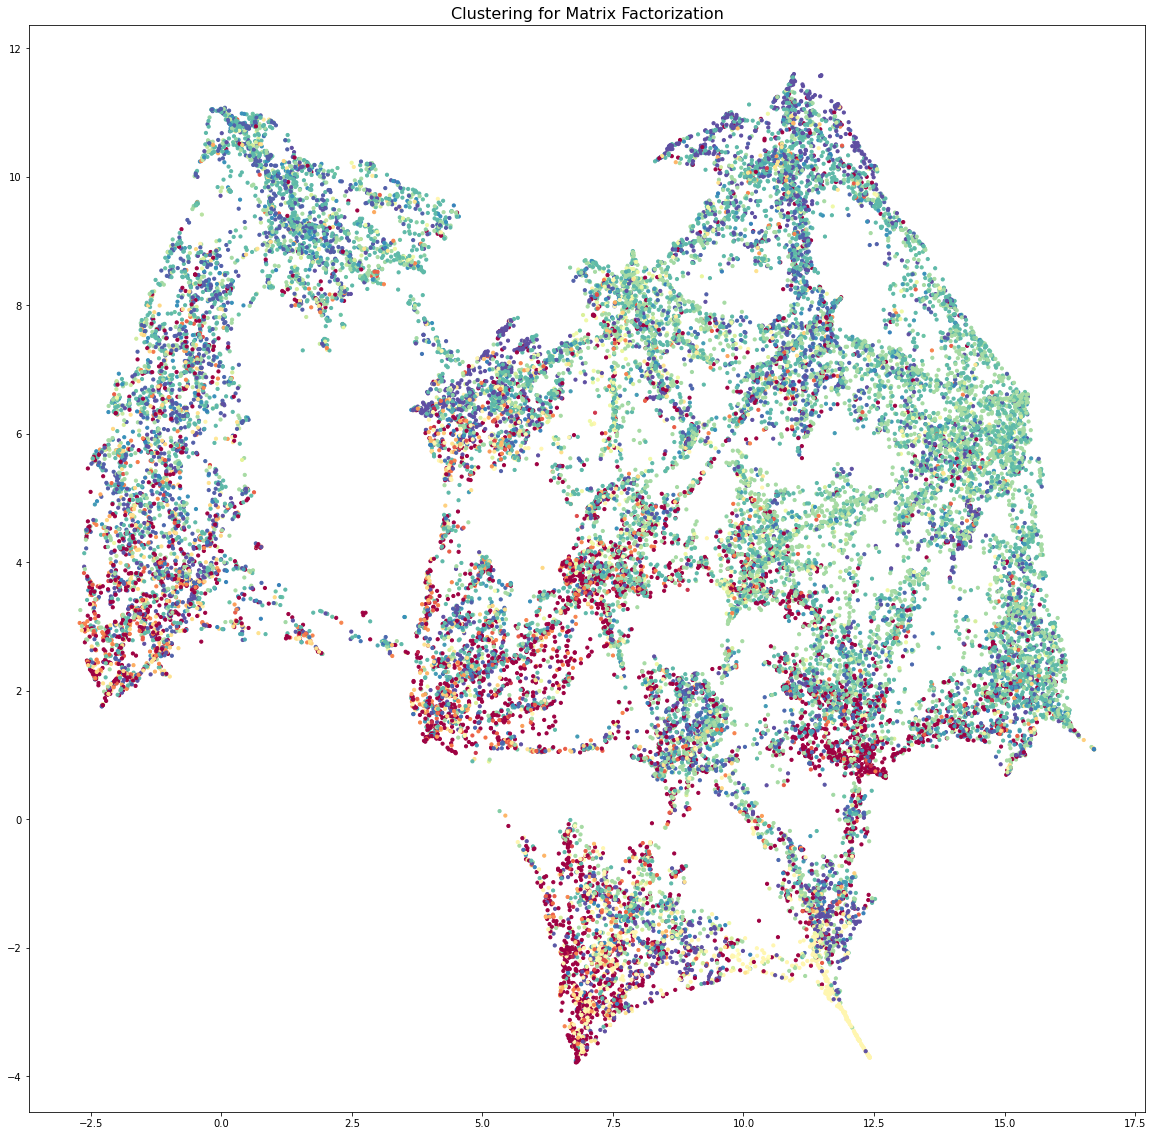

In [24]:
Visualize_clusters(model_1, "Clustering for Matrix Factorization")

## Latent Semantic Analysis (LSA)
Latent Semantic Indexing (LSI) technique identifies on words and phrases that
frequently occur with each other. Data scientists use LSI for faceted searches,
or for returning search results that aren’t the exact search term.Latent Semantic 
Analysis (LSA) attempts to leverage the context around the words to capture the 
hidden concepts, also known as topics. singular-value decomposition (SVD) is an 
important step in LSA.<br>
from the theory of linear algebra, there exists a decomposition of **X** such that **U** and **V** are orthogonal matrices and **Σ** is a diagonal matrix. This is called a **singular value decomposition (SVD)**

    X = U Σ V T 
A matrix containing word counts per paragraph (rows represent unique words and columns represent each paragraph) is constructed from a large piece of text and a mathematical technique called singular value decomposition (SVD) is used to reduce the number of rows while preserving the similarity structure among columns.<br>
**Pros:**
1. LSA is fast and easy to implement.
2. It gives decent results, much better than a plain vector space model.<br>

**Cons:**
1. Since it is a linear model, it might not do well on datasets with non-linear dependencies.
2. LSA assumes a Gaussian distribution of the terms in the documents, which may not be true for all problems.
3. LSA involves SVD, which is computationally intensive and hard to update as new data comes up.<br>

Source: https://www.analyticsvidhya.com/blog/2018/10/stepwise-guide-topic-modeling-latent-semantic-analysis/


In [25]:
model_2 = topic_modeling('svd',X)


Trying out Truncated SVD......


In [26]:
print("Most Important words under each Category using Latent Semantic Analysis.\n")
Get_MostImportant_words(model_2, vectorizer)

Most Important words under each Category using Latent Semantic Analysis.

Category 0: 
kill, love, father, famili, film, man, friend, life, becom, tell, leav, new, wife, tri, marri, mother, polic, son, home, return, make, time, come, live, year, work, girl, hous, young, meet, 

Category 1: 
tom, jerri, cat, spike, mous, butch, mammi, chase, grab, quacker, dog, joe, head, run, tail, ball, tyke, jack, hit, caus, georg, hole, nibbl, joan, hide, door, throw, mouth, catch, stick, 

Category 2: 
love, famili, tom, marri, father, stori, jerri, girl, mother, villag, life, son, film, marriag, live, daughter, fall, sister, friend, husband, parent, young, raj, raja, brother, vijay, relationship, movi, come, krishna, 

Category 3: 
joe, jack, mari, ann, jimmi, johnni, frank, nick, mike, sam, charli, money, jim, harri, billi, toni, ben, tell, car, mr, home, paul, steve, david, john, alic, mother, job, peter, leav, 

Category 4: 
joe, villag, polic, kill, gang, film, stori, murder, brother, vijay, r

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


Category 8: 
sam, bug, villag, father, ben, school, famili, team, elmer, jim, alien, charli, mother, johnni, game, boy, earth, parent, son, hous, ship, day, jake, friend, alex, attack, leav, kid, daffi, raja, 

Category 9: 
jim, johnni, charli, steve, gang, film, mike, toni, love, money, jack, team, town, hors, win, play, game, job, race, joan, dan, brother, ben, new, big, bob, jimmi, star, robberi, eddi, 

Category 10: 
sam, bug, mari, johnni, film, murder, ann, elmer, love, charli, man, stori, woman, henri, georg, marri, peter, war, young, husband, wife, daffi, plot, fall, killer, british, jimmi, rabbit, king, american, 

Category 11: 
johnni, harri, charli, villag, german, billi, money, british, war, team, job, school, train, love, gang, armi, race, win, bank, town, helen, eddi, voldemort, soldier, hors, tommi, pat, danni, help, frank, 

Category 12: 
charli, mari, johnni, john, david, max, chan, michael, king, brother, scott, joe, father, film, tom, children, brown, villag, mabel, 

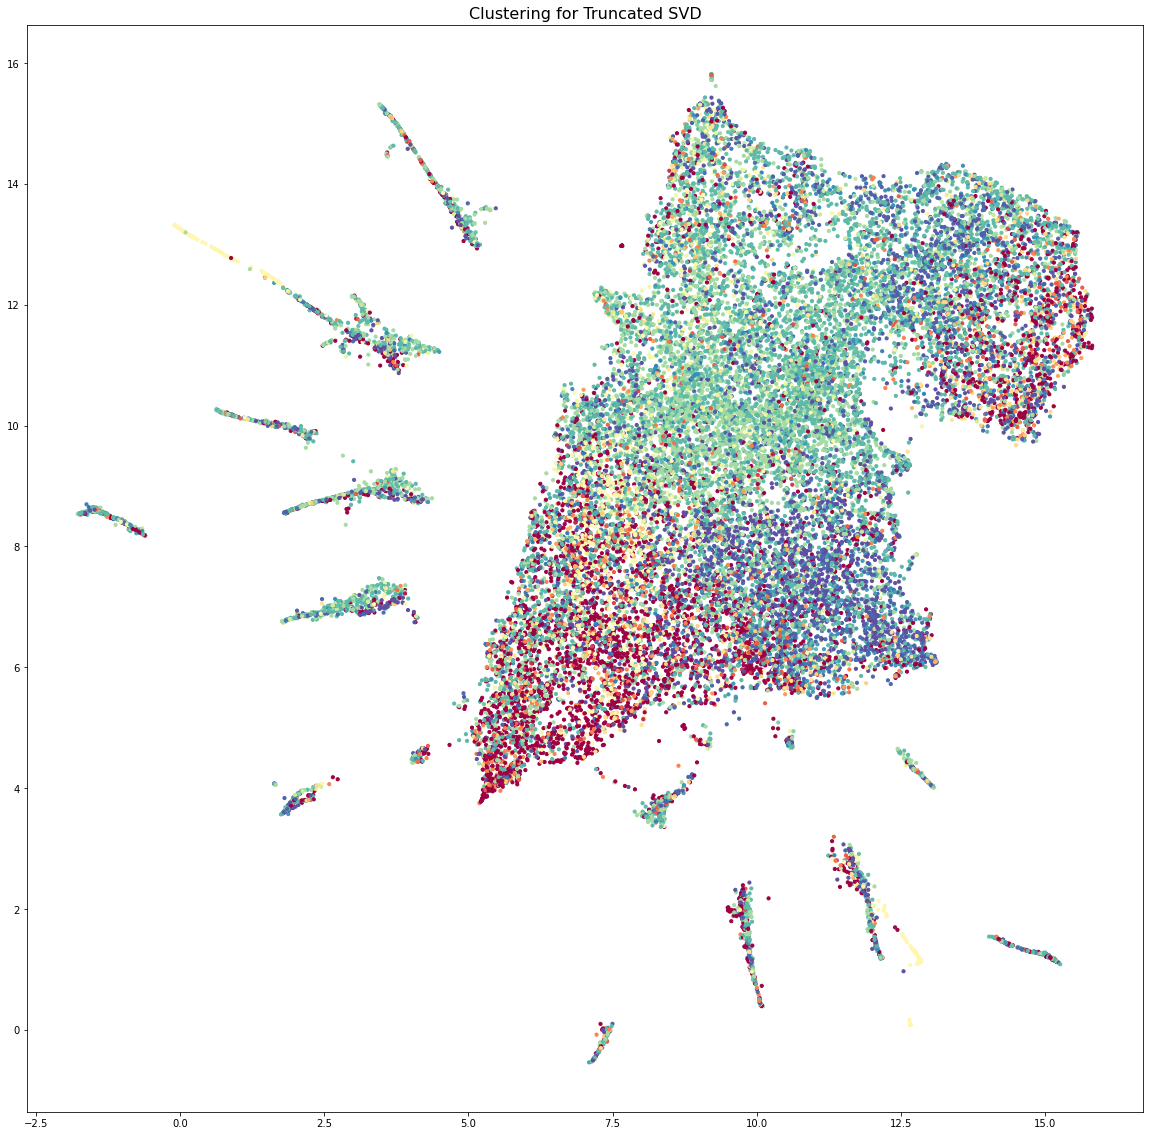

In [27]:
Visualize_clusters(model_2, "Clustering for Truncated SVD")

## Latent Dirichlet Allocation for Topic Modeling
In natural language processing, latent Dirichlet allocation (LDA) is a generative statistical model that allows sets of observations to be explained by unobserved groups that explain why some parts of the data are similar. For example, if observations are words collected into documents, it posits that each document is a mixture of a small number of topics and that each word's presence is attributable to one of the document's topics.<br>
Source - Wikipedia<br>
latent Dirichlet allocation(LDA), a generative probabilistic model for collections of discrete data such as text corpora. LDA is a three-level hierarchical Bayesian model, in which each item of a collection is modeled as a finite mixture over an underlying set of topics. Each topic is, in-turn, modeled as an infinite mixture over an underlying set of topic probabilities. In the context of text modeling, the topic probabilities provide an explicit representation of a document.<br>
Source - [Journal of Machine Learning Research 3 (2003) 993-1022Submitted 2/02; Published 1/03Latent Dirichlet Allocation](http://www.jmlr.org/papers/volume3/blei03a/blei03a.pdf)

In [28]:
model_3 = topic_modeling('LDA',X)


Trying out Latent Dirichlet Allocation......


In [29]:
print("Most Important words under each Category using Latent Dirichlet Allocation.\n")
Get_MostImportant_words(model_3, vectorizer)

Most Important words under each Category using Latent Dirichlet Allocation.

Category 0: 
maisi, amal, raghav, dani, mirza, enterpris, leonora, zorro, jp, robi, kidd, manon, spock, kirk, subbu, arti, viren, yeong, frodo, harsha, shrek, sreekumar, khari, pandora, picard, bijli, selen, ak, suryam, piya, 

Category 1: 
sach, heidi, deepika, bhagat, cao, gabi, gilli, digimon, mowgli, blondi, arlington, jaggu, hanlon, autri, hermion, speedi, sudheer, mukundan, nightingal, digidestin, dagwood, voldemort, augi, cappi, dumbledor, cheenu, pandava, erika, midg, kalidasa, 

Category 2: 
ramya, preeti, siddhu, aema, braddock, kasi, moti, swetha, marpl, blackwood, murtaugh, hanuman, tilak, bhoothnath, anarkali, ashwini, zhong, dharam, manja, henriett, grendel, yuvraj, belveder, battaglia, subramanyam, babar, lum, deckard, jwala, lahari, 

Category 3: 
sita, sakthi, nirmala, ashwin, manju, shalini, kashi, inder, vasanthi, naveen, ballu, revathi, madhava, sher, rajaram, nandana, gidget, malati, dhana

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


home, famili, wife, murder, life, make, work, return, young, time, polic, mother, year, hous, john, meet, woman, live, marri, 

Category 8: 
sinbad, jonah, lonni, chucki, custer, reev, bess, fallon, gradi, hassan, dugan, rigg, winslow, berti, mercer, raoul, cleopatra, yuki, lina, jamal, lucia, frenchi, killian, roberto, hester, norwegian, nadin, darbi, airship, moreau, 

Category 9: 
war, ship, german, kill, attack, british, island, soldier, command, armi, american, captain, world, japanes, escap, destroy, group, forc, earth, crew, king, captur, alien, mission, human, use, power, battl, agent, unit, 

Category 10: 
bug, jerri, tom, elmer, spike, ella, cat, mous, butch, sanju, mammi, yama, geoff, goldi, chrissi, cinderella, rei, ishaan, cartoon, wukong, sridhar, bunni, rabbit, cheech, liza, kunchacko, loki, toot, odin, toodl, 

Category 11: 
conan, makoto, lama, superman, ballard, calder, geni, lupin, shinji, mcclane, pa, bixbi, remo, aladdin, irena, gremlin, riddick, finley, bambi, cha

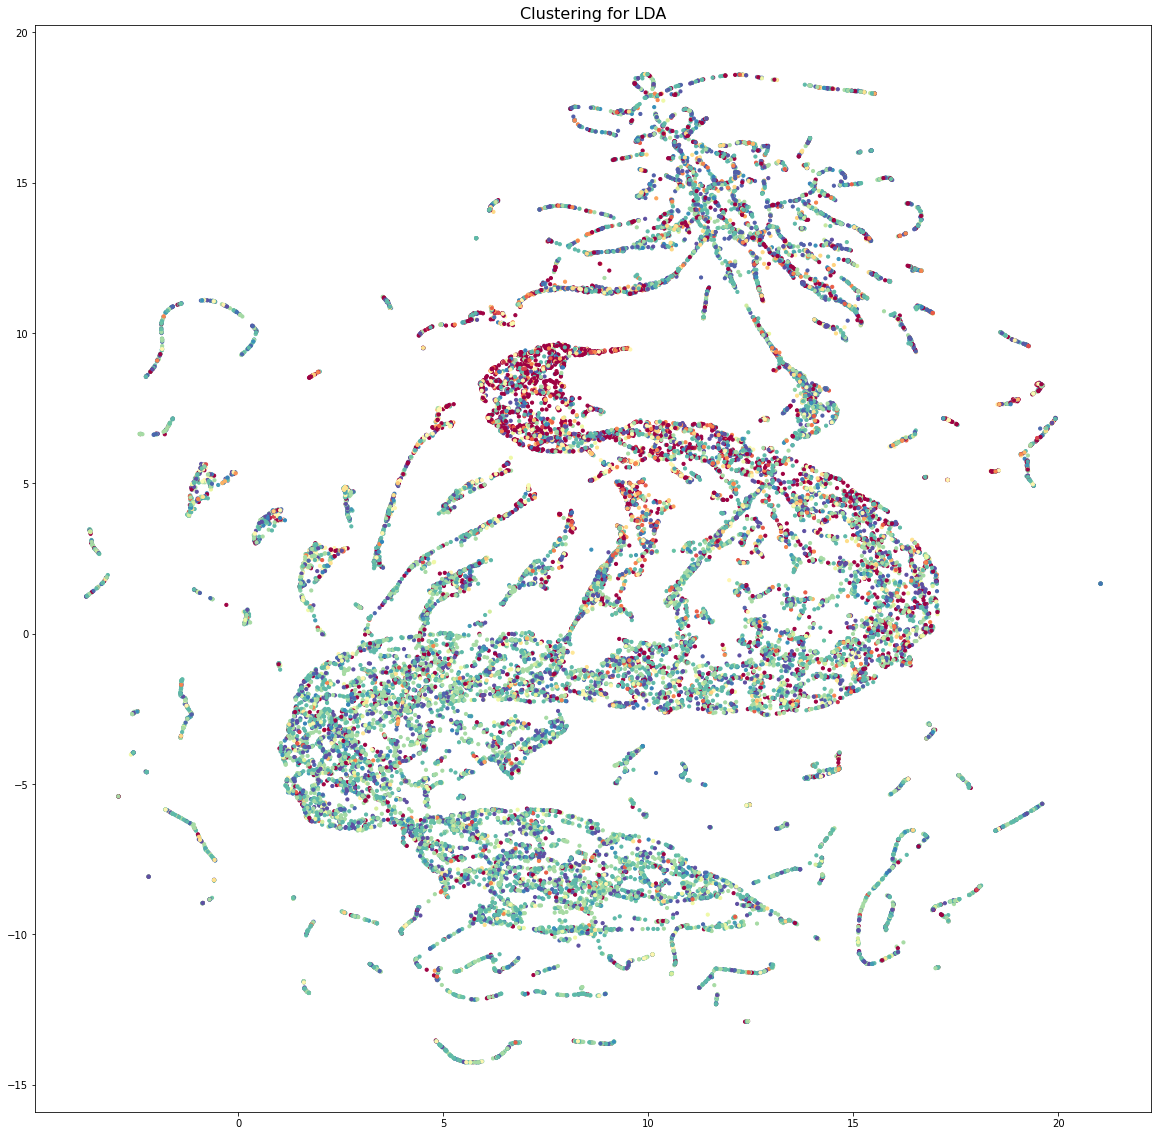

In [30]:
Visualize_clusters(model_3, "Clustering for LDA")


**According to my opinion Matrix Factorization and LDA clustered in a much better way compared to SVD.
Apart from LDA There are other advanced and efficient topic modeling techniques also
which could be applied and analyze their performance in case of unsupervised learning.
**